In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as ticker
import seaborn as sns
import functools
import operator

import CBGTC
import basalganglia
import thalamusFC

rcParams.update({'font.size': 20, 'font.family': 'DejaVu Sans', 'mathtext.fontset': 'stix'})
rcParams['axes.labelpad'] = 25
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['lines.linewidth'] = 3

In [2]:
"""
Functions
"""

def salienceMatrix(ch1, ch2, ch3):
    salience_matrix = np.zeros((3, n_stages * steps_per_stage))
    salience_matrix[0] = functools.reduce(operator.iconcat, [i*2000 for i in ch1], [])
    salience_matrix[1] = functools.reduce(operator.iconcat, [i*2000 for i in ch2], [])
    salience_matrix[2] = functools.reduce(operator.iconcat, [i*2000 for i in ch3], [])
    return salience_matrix


"""
Graph variables
"""

salience_color = 'orange'
GPi_color = 'darkcyan'


In [3]:
CBGTC.main()

CBG model created
6 channels
Inhibition at rest:  0.09551510955177993
step 1 : inhibitory output at rest 0.09551511249028455
step 2 : channel 1 selected
step 3 : Channel 2 selected alone
step 4 : Channels 1 and 2 similarly selected
step 5 : Channel 2 selected alone


In [4]:
"""
Figure 2A
"""

# Parameters

n_stages = 5
steps_per_stage = 2000
init_steps = 1000
n_channels = 6
total_steps = n_stages * steps_per_stage + init_steps

saliences_ch1 = [[0.0], [0.4], [0.4], [0.6], [0.4]]
saliences_ch2 = [[0.0], [0.0], [0.6], [0.6], [0.6]]
saliences_ch3 = [[0.0], [0.0], [0.0], [0.0], [0.0]]

saliences = salienceMatrix(saliences_ch1, saliences_ch2, saliences_ch3)

# Load data from log file 

data = np.loadtxt('/Users/administrator/Documents/Cogmaster/Robotics/log/BG_CBG')

# Extract GPi/SNR output (final 6 entries of each line)

GPi = np.zeros((total_steps, n_channels))
for step in range(total_steps):
    GPi[step] = data[step, -6:]
    
rest_inhibition = GPi[100, 0]  # GPi output in absence of salience, used as selection threshold
    
GPi_after_init = np.delete(GPi, slice(init_steps), 0)  # GPi output with initialisation period (1000 steps) removed

x = np.arange(total_steps - init_steps) # x axis range

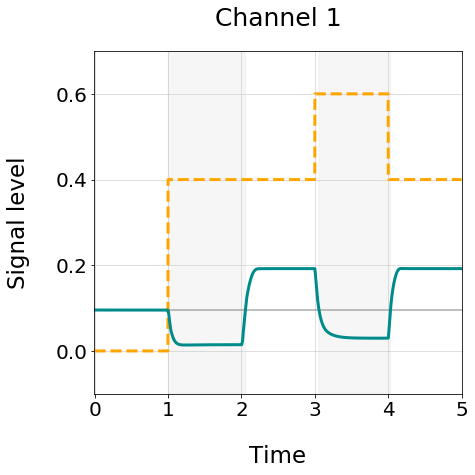

In [5]:
# Channel 1

fig, ax = plt.subplots(figsize=(7, 7))
ax.axhline(rest_inhibition, color='gray', alpha=.5, lw=2)
ax.plot(saliences[0], ls='--', c=salience_color, label='Saliences')
ax.plot(GPi_after_init[:, 0], c=GPi_color, label='Gpi')
ax.set_xlabel(r'Time', fontsize=23)
ax.set_ylabel(r'Signal level', fontsize=23)

ax.set_title(r'Channel 1', fontsize=25, pad=25)
# ax.set_title(r'$\lambda_g = \lambda_e = 0.2$', fontsize=30, pad=25)  

boolean = GPi_after_init[:, 0] < rest_inhibition
ax.fill_between(x, 0, 1, where=boolean, color='lightgray', alpha=0.2, transform=ax.get_xaxis_transform())

ax.grid(b=True, which='major', alpha=0.5)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax.set_xticklabels([0, 1, 2, 3, 4, 5])
ax.set_ylim([-0.1, 0.7])
ax.set_xlim([-10, 10000])

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()

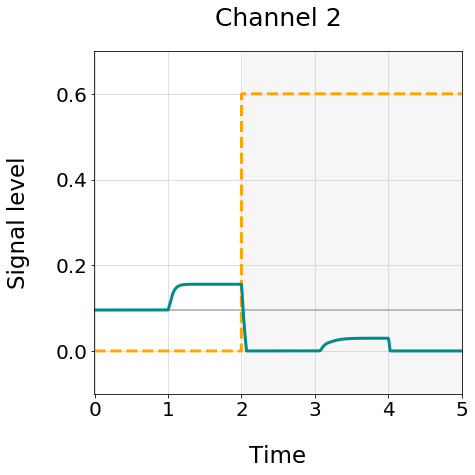

In [6]:
# Channel 2

fig, ax = plt.subplots(figsize=(7, 7))
ax.axhline(rest_inhibition, color='gray', alpha=.5, lw=2)
ax.plot(saliences[1], ls='--', c=salience_color, label='Saliences')
ax.plot(GPi_after_init[:, 1], c=GPi_color, label='Gpi')

ax.set_xlabel(r'Time', fontsize=23)
ax.set_ylabel(r'Signal level', fontsize=23)
ax.set_title(r'Channel 2', fontsize=25, pad=25)

boolean = GPi_after_init[:, 1] < rest_inhibition
ax.fill_between(x, 0, 1, where=boolean, color='lightgray', alpha=0.2, transform=ax.get_xaxis_transform())

ax.grid(b=True, which='major', alpha=0.5)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax.set_xticklabels([0, 1, 2, 3, 4, 5])
ax.set_ylim([-0.1, 0.7])
ax.set_xlim([-10, 10000])

fig.tight_layout()



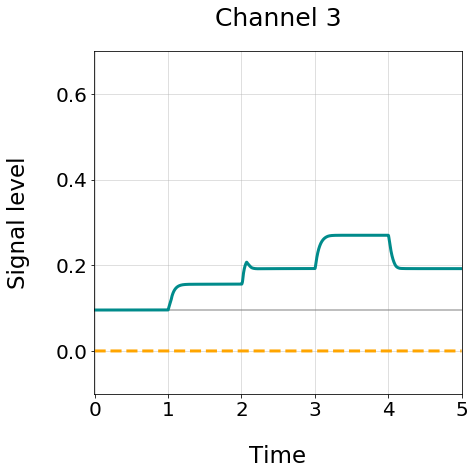

In [7]:
# Channel 3

fig, ax = plt.subplots(figsize=(7, 7))
ax.axhline(rest_inhibition, color='gray', alpha=.5, lw=2)
ax.plot(saliences[2], ls='--', c=salience_color, label='Saliences')
ax.plot(GPi_after_init[:, 2], c=GPi_color, label='Gpi')

ax.set_xlabel(r'Time', fontsize=23)
ax.set_ylabel(r'Signal level', fontsize=23)
ax.set_title(r'Channel 3', fontsize=25, pad=25)

ax.grid(b=True, which='major', alpha=0.5)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax.set_xticklabels([0, 1, 2, 3, 4, 5])
ax.set_ylim([-0.1, 0.7])
ax.set_xlim([-10, 10000])

fig.tight_layout()


